<h2>Tasca M8 T01</h2>
<p>Utilitzarem el dataset "Publicacions Facebook Thailandia" que conté informació sobre publicacions de facebook de Tailàndia.</p>

<p>Number of Instances: 7050</p>
<p>Number of Attributes: 16 continuous attributes</p>
    
<h3>Attribute Information:</h3>

<table>
  <tr>
    <th>Attribute</th>
    <th>Descripció</th>
  </tr>
  <tr>
    <td>status_id</td>
    <td>identificació d'usuari</td>
  </tr>
  <tr>
    <td>status_type</td>
    <td>que s'ha publicat</td>
  </tr>
  <tr>
    <td>status_published</td>
    <td>quan s'ha publicat</td>
  </tr>
  <tr>
    <td>num_reactions</td>
    <td>Número de vegades que s'ha reaccionat a la publicació</td>
  </tr>
  <tr>
    <td>num_comments</td>
    <td>Número de comentaris que ha obtingut la publicació</td>
  </tr>
  <tr>
    <td>num_shares</td>
    <td>Número de vegades que s'ha compartit la publicació</td>
  </tr>
  <tr>
    <td>num_likes</td>
    <td>Número de vegades que s'ha clicat "m'agrada"</td>
  </tr>
  <tr>
    <td>num_loves</td>
    <td>Número de vegades que s'ha clicat la icona del "cor"</td>
  </tr>
  <tr>
    <td>num_wows</td>
    <td>Número de vegades que s'ha clicat la icona de "entusiasme"</td>
  </tr>
  <tr>
    <td>num_hahas</td>
    <td>Número de vegades que s'ha clicat la icona de "riure"</td>
  </tr>
  <tr>
    <td>num_sads</td>
    <td>Número de vegades que s'ha clicat la icona de "trist"</td>
  </tr>
  <tr>
    <td>num_angrys</td>
    <td>Número de vegades que s'ha clicat "no m'agrada"</td>
  </tr>
  <tr>
    <td>Column1/2/3/4</td>
    <td>columnes buides</td>
  </tr>
</table>

In [552]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from scipy.stats import ttest_1samp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")



In [553]:
df = pd.read_csv('PF_Thailandia.csv')

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [554]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [555]:
df.shape

(7050, 16)

S'eliminen les columnes buides i les que no ens aporten informació rellevant com 'status_id', 'status_published.

In [556]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [557]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Mirem els Nan i els duplicats i eliminem aquests últims

In [558]:
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [559]:
df.isna().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [560]:
df.duplicated().sum()

2063

In [561]:
df.drop_duplicates(subset=None, keep="first", inplace=True)

In [562]:
df.duplicated().sum()

0

La variable status_type conté dades categòriques. Les passarem a numèriques amb One-Hot encoding /dummies per poder utilitzar-les.

In [563]:
df = pd.get_dummies(df, columns = ["status_type"])
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,86,0,0,86,0,0,0,0,0,0,1,0,0
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0


Un cop convertides a dummies hem de treure la variable a la qual l'havíem aplicat i reanomenem les noves columnes amb noms més senzills.

In [564]:
df.drop(['status_type_status'], axis=1, inplace=True)
df.rename(columns={'status_type_link': 'link', 'status_type_photo': 'foto', 'status_type_video': 'video'}, inplace=True)
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,foto,video
0,529,512,262,432,92,3,1,1,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0
2,227,236,57,204,21,1,1,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0
4,213,0,0,204,9,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,86,0,0,86,0,0,0,0,0,0,1,0
7045,89,0,0,89,0,0,0,0,0,0,1,0
7046,16,0,0,14,1,0,1,0,0,0,1,0
7047,2,0,0,1,1,0,0,0,0,0,1,0


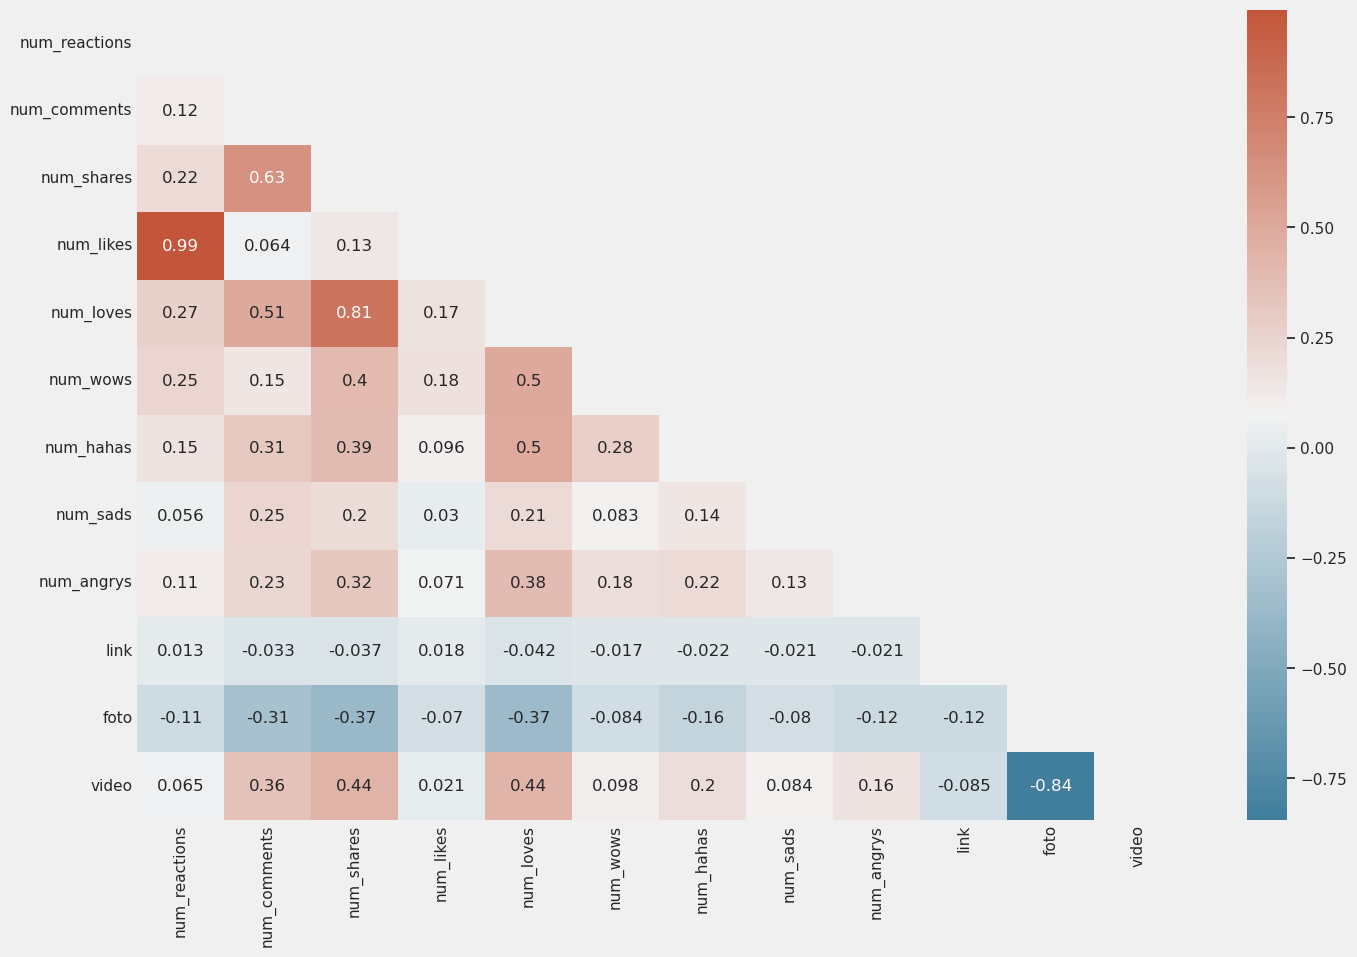

In [565]:
fig, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

Notem una gran correlació positiva entre el num_likes amb les num_reactions, així com els num_love amb el num_shares.
Pel que fa a la correlació negativa podríem destacar la de les variables foto - vídeo.


Text(0.5, 0.98, 'Distribució de les variables numèriques')

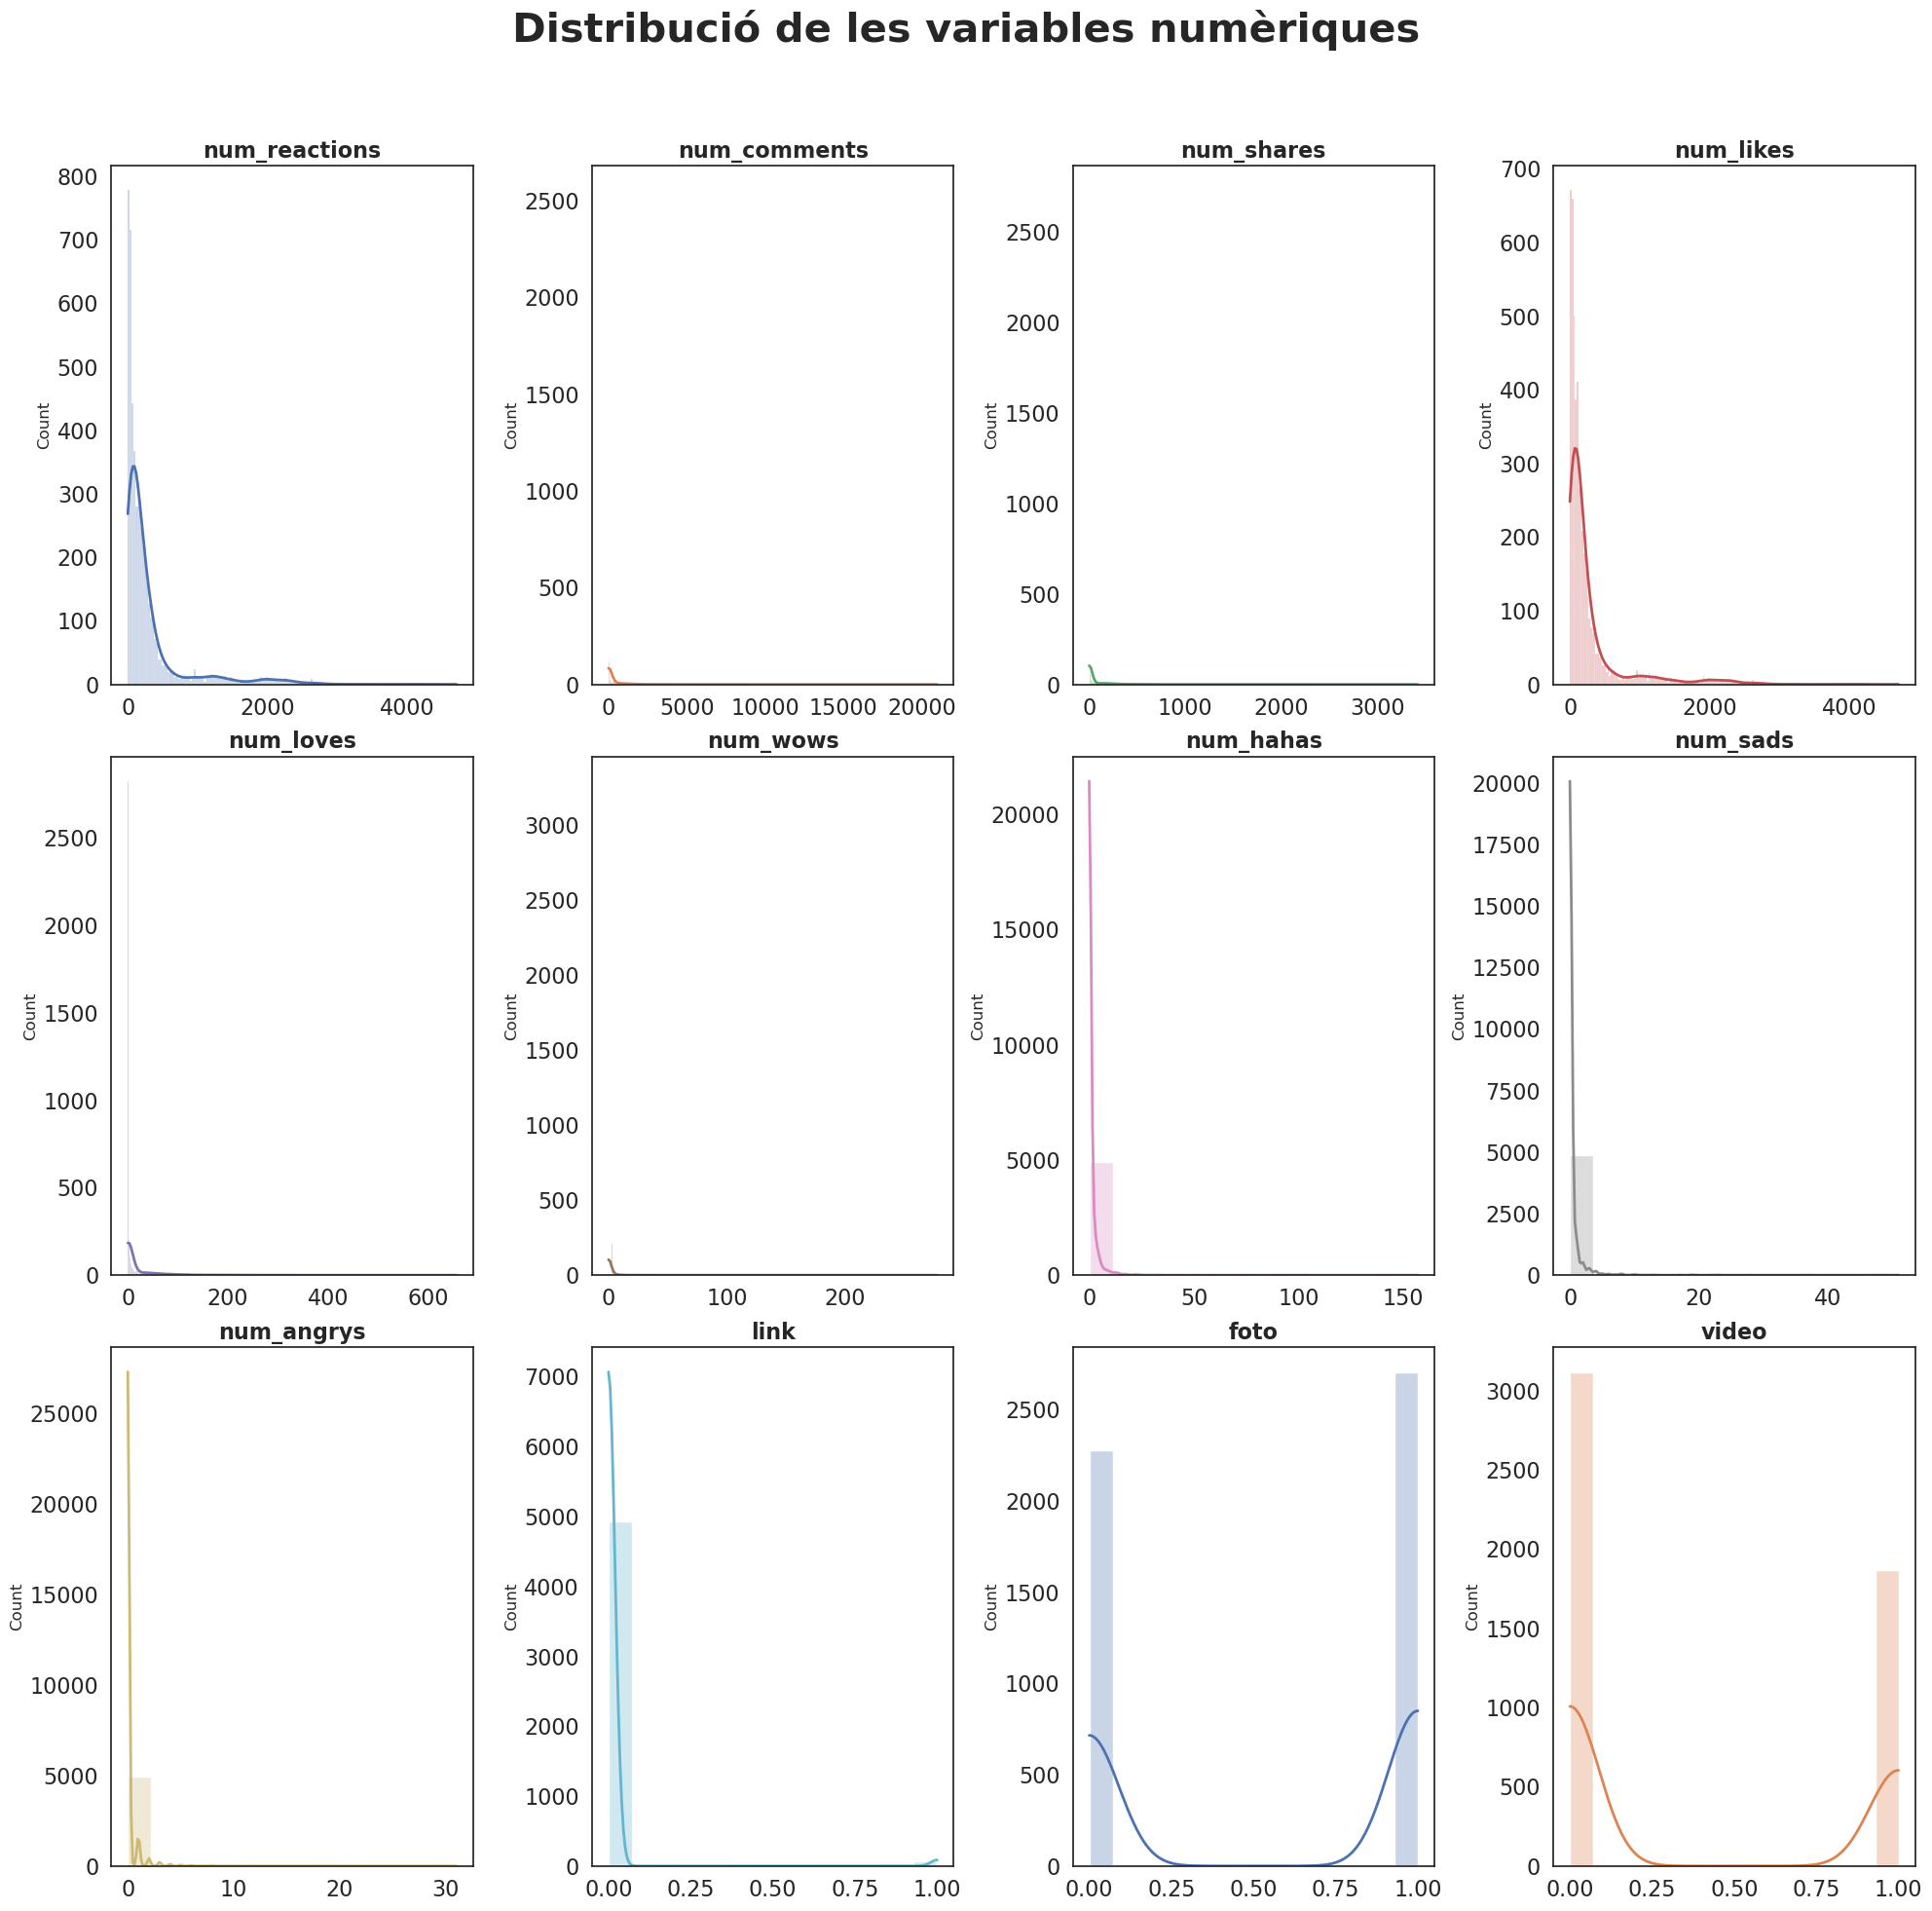

In [566]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))
axes = axes.flat

for i, colum in enumerate(df):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les variables numèriques', fontsize = 30, fontweight = "bold")



<Figure size 800x500 with 0 Axes>

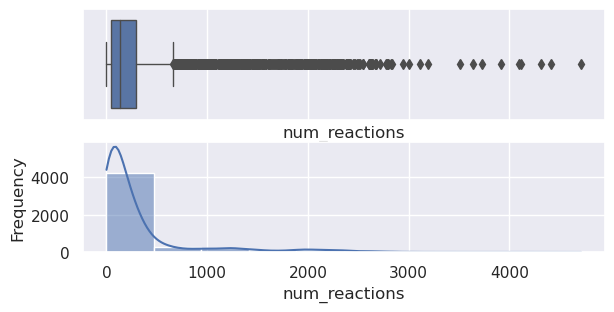

<Figure size 600x300 with 0 Axes>

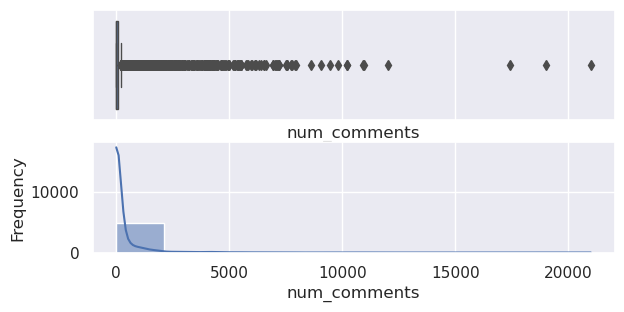

<Figure size 600x300 with 0 Axes>

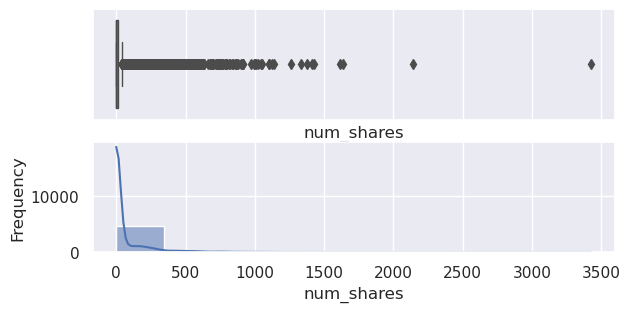

<Figure size 600x300 with 0 Axes>

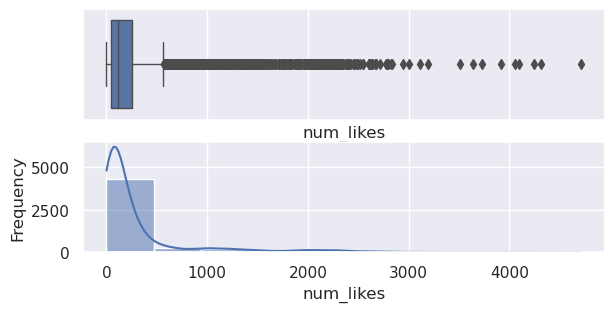

<Figure size 600x300 with 0 Axes>

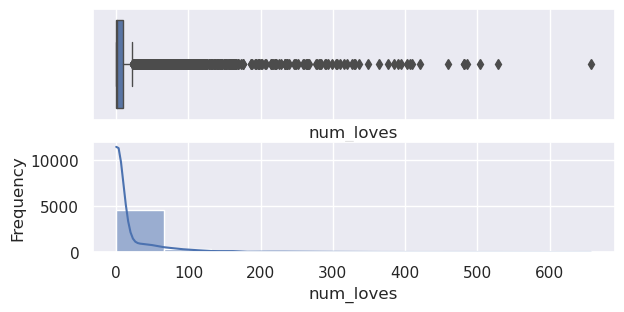

<Figure size 600x300 with 0 Axes>

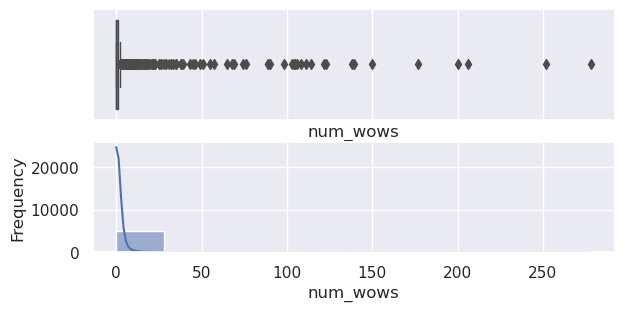

<Figure size 600x300 with 0 Axes>

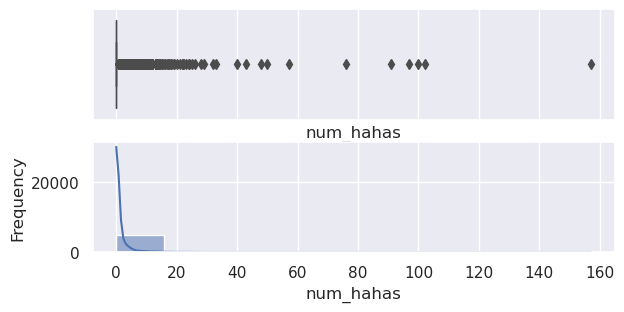

<Figure size 600x300 with 0 Axes>

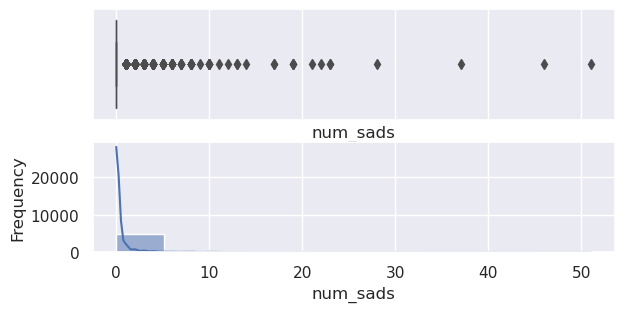

<Figure size 600x300 with 0 Axes>

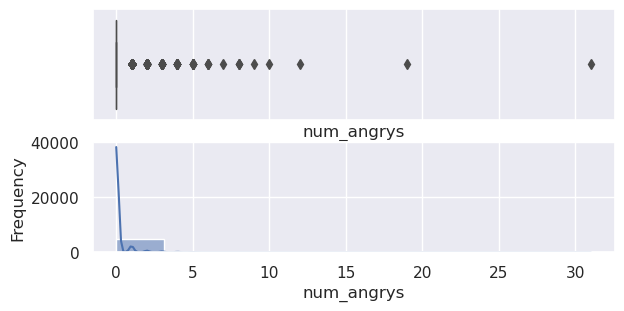

<Figure size 600x300 with 0 Axes>

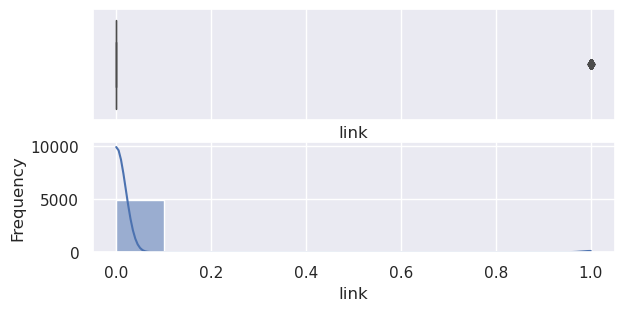

<Figure size 600x300 with 0 Axes>

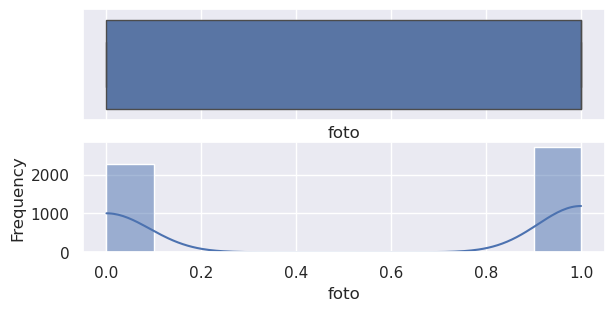

<Figure size 600x300 with 0 Axes>

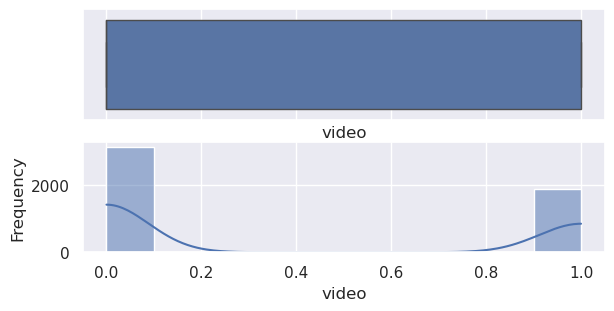

In [567]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(6, 3)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)
    

Observant els gràfics anteriors sembla ser a priori que la distribució que hem vist no sigui gaussiana per a cap variable, tot i així fem un shapiro test per assegurar-nos i comprovar-ho matemàticament.

In [568]:

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  num_reactions amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_comments amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_shares amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_likes amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_loves amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_wows amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_hahas amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_sads amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  num_angrys amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  link amb un p-value de  0.0
Podem rebutjar l'hipotesis nula

Per la variable  foto amb un p-value de  0

El p-value igual a 0 ens ha confirmat que la mostra no té una distribució normal per la qual cosa no serien gaussianes.

Fem un Robuscaler per les variables amb outliers i cal recordar que les variables categòriques ja les hem convertit en dummies i les tenim escalades entre 0 i 1, no cal fer cap altre preprocessat

In [569]:
columnsRobust = ['num_reactions', 'num_comments', 'num_shares', 'num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])


# - Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 Important / Tingues en compte que prèviament et caldrà preparar el dataset.
    
    


    
 
    
En primer lloc, separo les dummies per fer el PCA sense elles.

In [570]:
X = df.drop(['link', 'foto', 'video'], axis=1)
y = df[['link', 'foto', 'video']]
pca = PCA().fit(X)

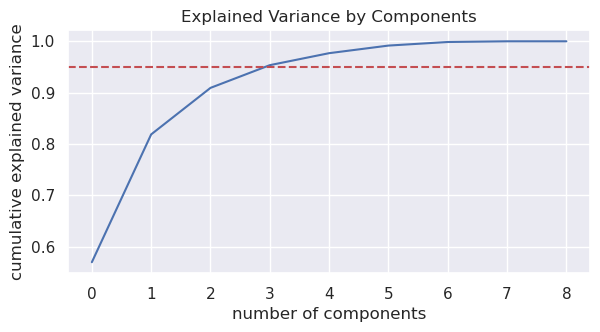

In [571]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

En el gràfic anterior semblaria ser que el número ideal seria de 3 components. Ho comprovarem esbrinant quin número de components seria ideal que tingués el PCA perquè recollís almenys 95% de totes les dades.

In [572]:
pca = PCA(.95).fit(X)
print(pca.n_components_)

4


Ens ha donat com a resultat 4 components, així que tornem a fer el PCA aquest cop amb els 4 indicats.

In [573]:

pca = PCA(n_components=4)
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(X), columns=['Component_1','Component_2','Component_3','Component_4'], index=df.index)
df_pca.head()    



,Component_1,Component_2,Component_3,Component_4
0,11.465069,1.300174,-9.785265,-2.034848
1,-5.802388,0.007005,0.627184,-0.196516
2,-0.813956,-0.127596,-0.886226,0.107532
3,-5.812120,-0.005575,0.630756,-0.207339
4,-5.515286,0.136032,0.327653,-0.014474


Concatenar les variables dummies al resultat del PCA

In [574]:

df_pca_dummies = pd.concat([df_pca, y], axis=1)


Passem a fer el metodo del codo per veure quants clústers hauríem de fer servir al K-Means.


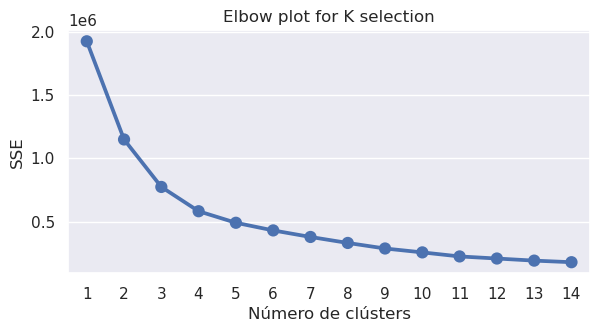

In [575]:

def elbow_plot(df):
    sse = {}
    sse_r = []
    for k in range(1, 15):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_
        sse_r.append(kmeans.inertia_)
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('Número de clústers')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()
    return sse_r
sse = elbow_plot(df_pca_dummies)



In [576]:

kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
kl.elbow


4

Fem K-means amb els 4 clusters que ens ha indicat. 

In [577]:
k_means = KMeans(n_clusters=4, random_state=42)
k_means.fit(df_pca_dummies)

KMeans(n_clusters=4, random_state=42)

In [578]:
centroides = k_means.cluster_centers_
y_pred = k_means.predict(df_pca_dummies)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [579]:
df['Cluster'] = y_pred
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,foto,video,Cluster
0,1.605691,5.770115,16.3125,1.526316,10.111111,3.0,1.0,1.0,0.0,0,0,1,1
1,0.065041,-0.114943,-0.0625,0.177033,-0.111111,0.0,0.0,0.0,0.0,0,1,0,0
2,0.378049,2.597701,3.5000,0.435407,2.222222,1.0,1.0,0.0,0.0,0,0,1,0
3,-0.093496,-0.114943,-0.0625,-0.009569,-0.111111,0.0,0.0,0.0,0.0,0,1,0,0
4,0.321138,-0.114943,-0.0625,0.435407,0.888889,0.0,0.0,0.0,0.0,0,1,0,0


In [580]:
df.Cluster.value_counts()

0    4319
1     539
2     104
3      25
Name: Cluster, dtype: int64

Com podem comprovar gràficament la major part de les dades estan al primer cluster (nº0), i el últim el (nº3) quasi no en té.

<AxesSubplot:xlabel='Cluster', ylabel='count'>

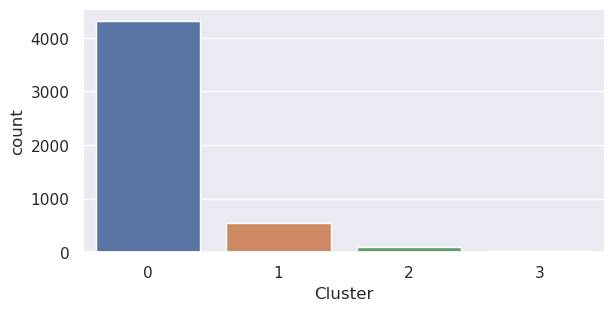

In [581]:
sns.countplot(x = df['Cluster'])

En els següents gràfics podríem veure com queden repartides les variables per cada clúster.

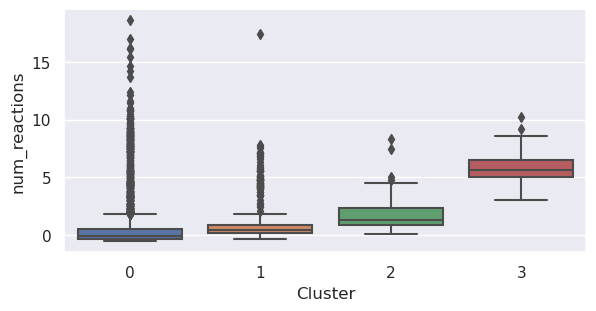

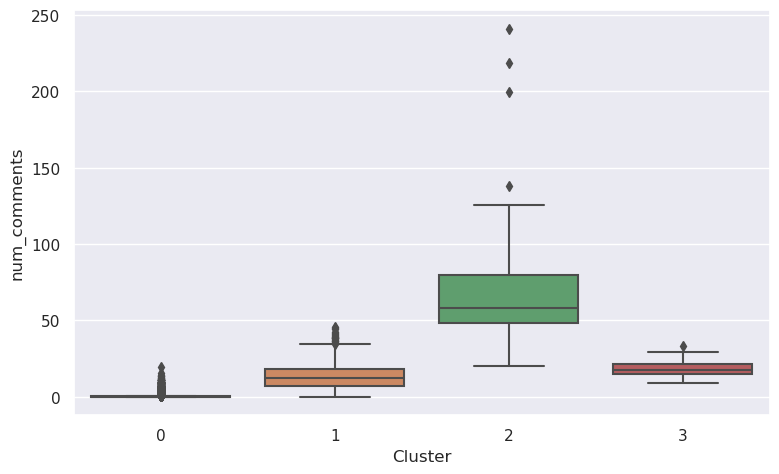

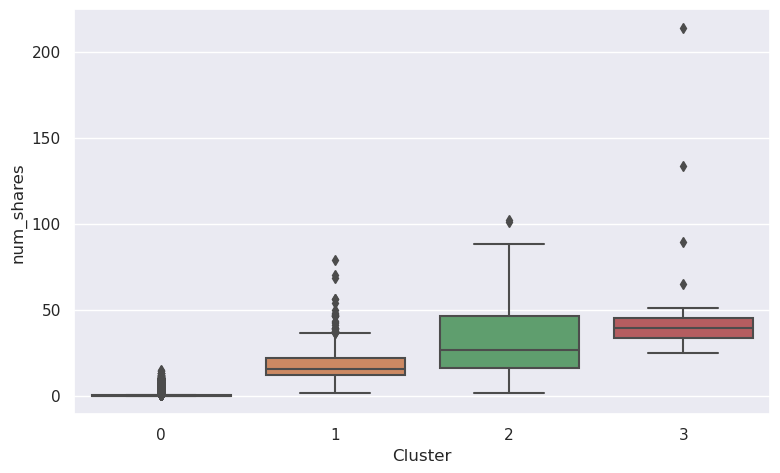

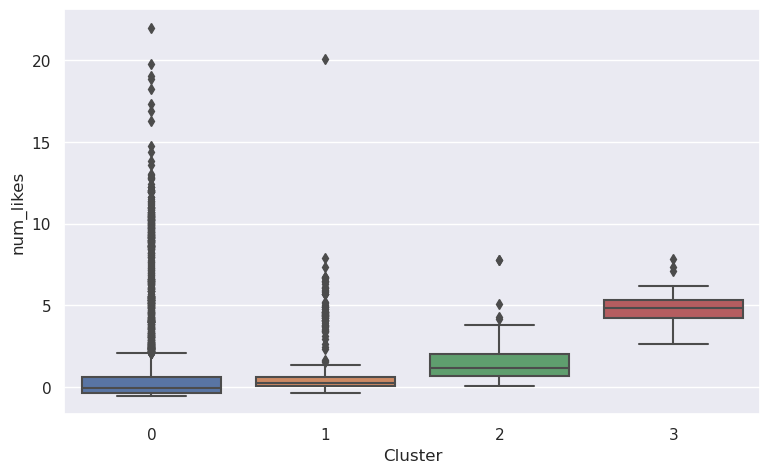

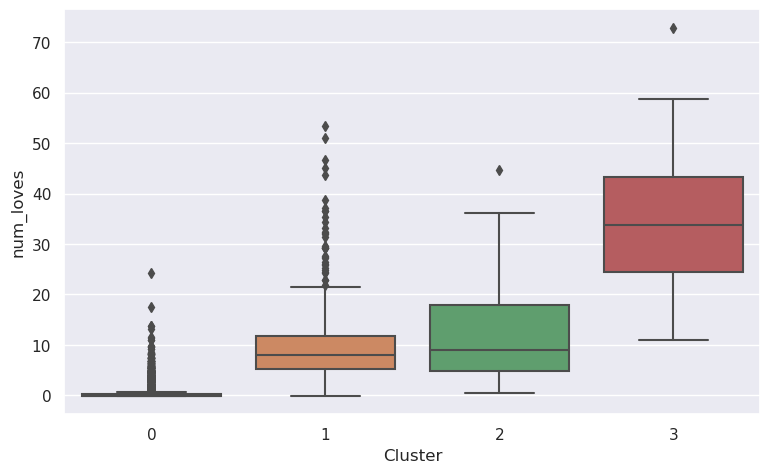

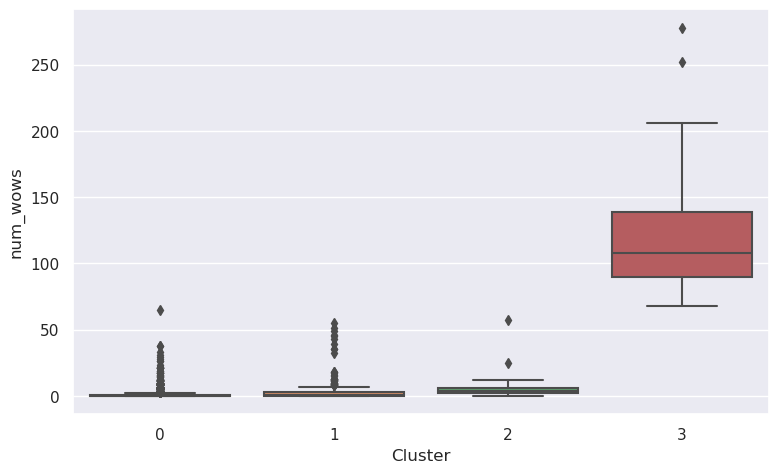

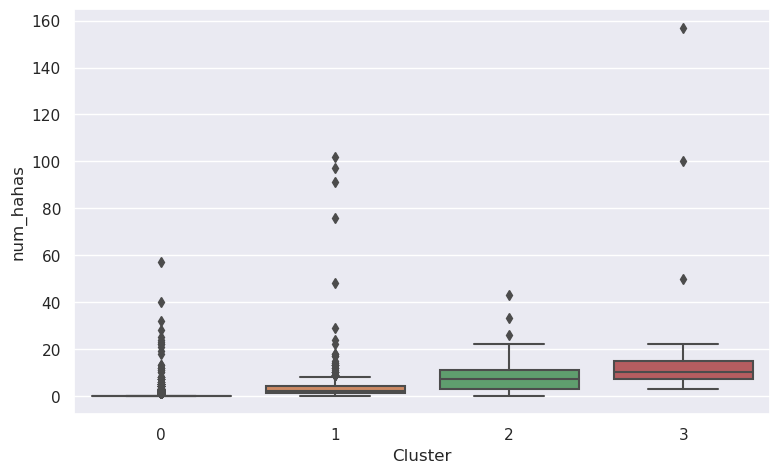

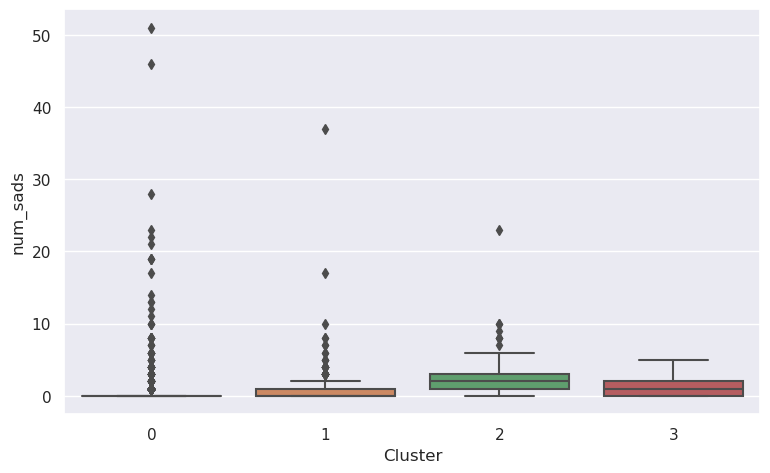

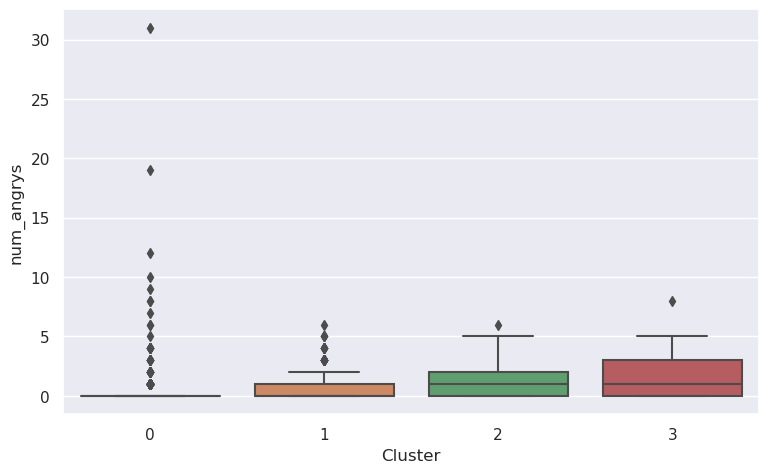

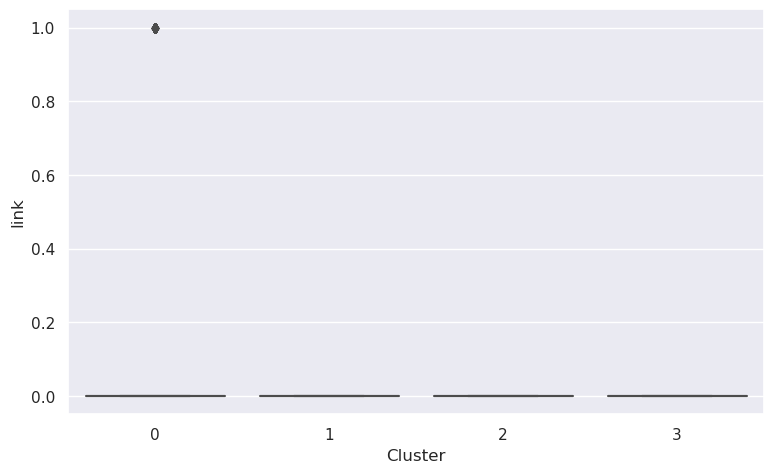

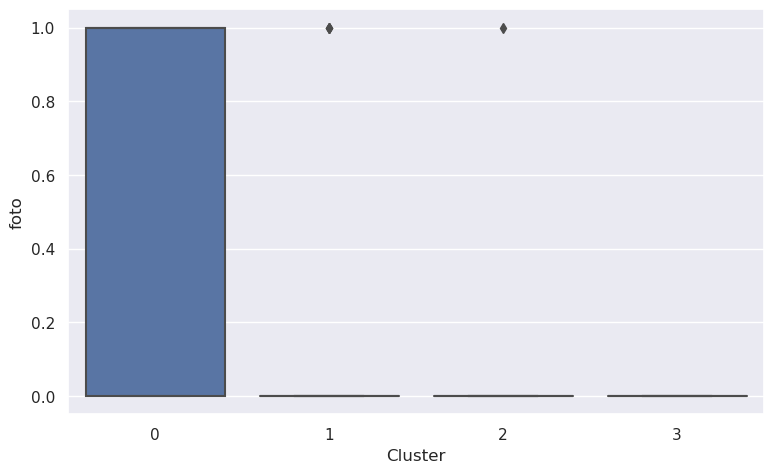

In [582]:
columns = df.columns[:-2]

for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster', y=i, data=df)


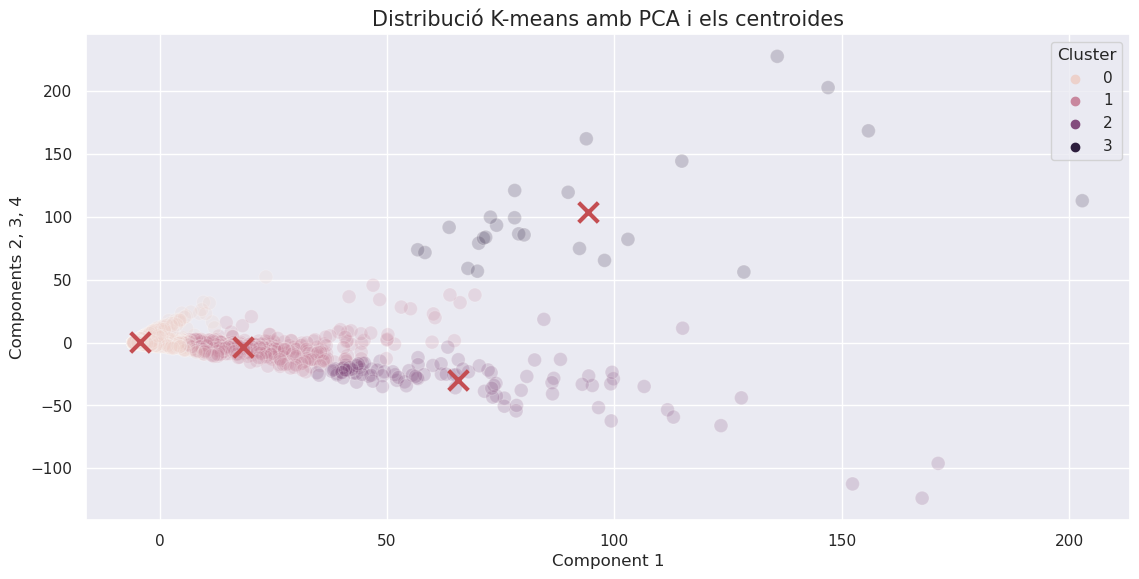

In [584]:
clusters_pca = df_pca_dummies[['Component_1', 'Component_2', 'Component_3', 'Component_4']]
labels_pca = df['Cluster']
plt.figure(figsize=(12, 6))
sns.scatterplot(clusters_pca.iloc[:, 0], clusters_pca.iloc[:, 1], hue=labels_pca, s=100, alpha=0.2)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Components 2, 3, 4')
plt.title('Distribució K-means amb PCA i els centroides', fontsize=15)
plt.legend(title='Cluster')
plt.show()


# - Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.



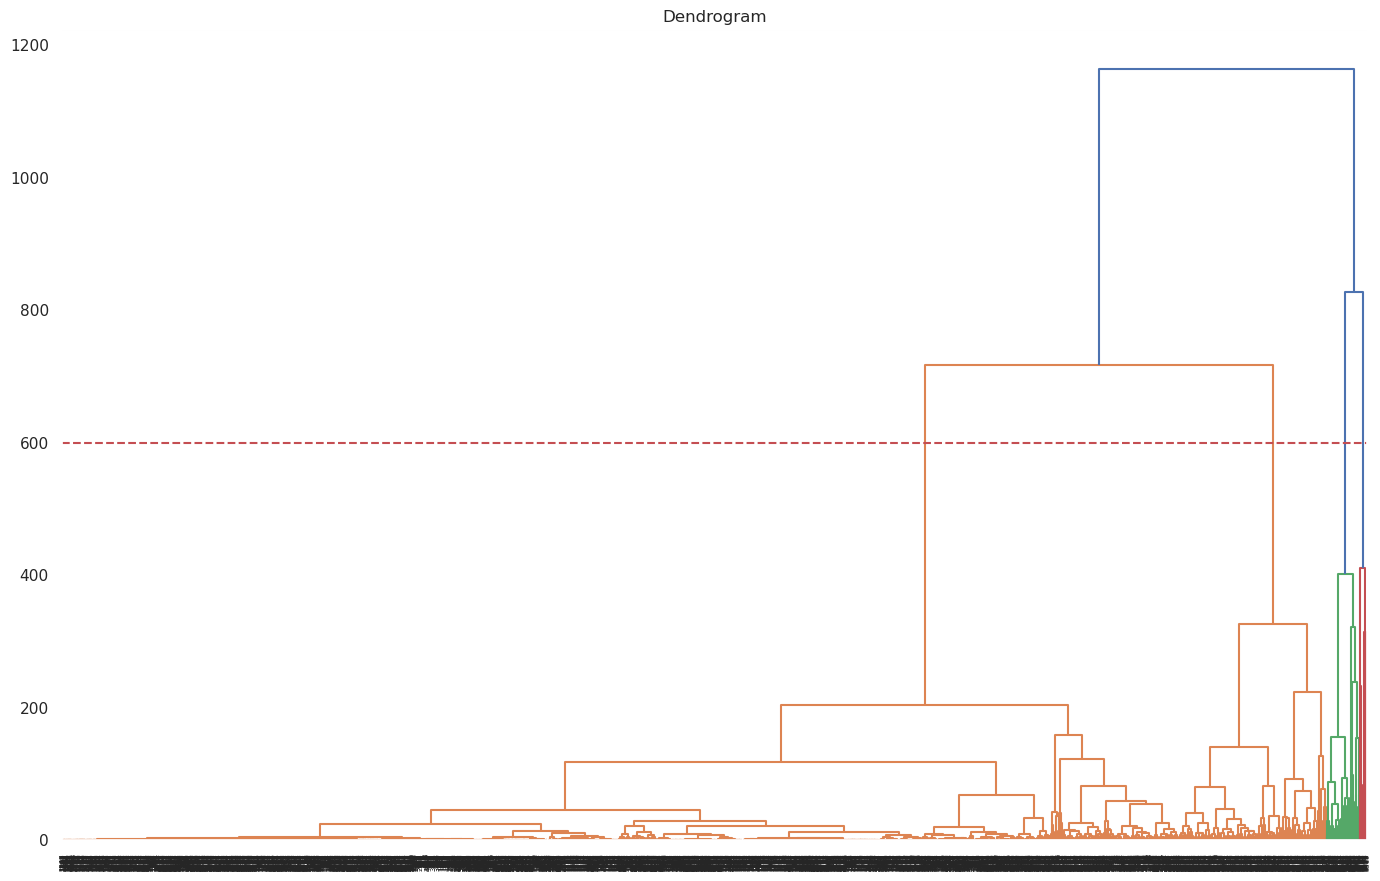

In [585]:
plt.figure(figsize = (15, 10))  
plt.title("Dendrogram")  
sch.dendrogram(sch.linkage(df_pca_dummies, method = "ward"))
plt.axhline(y = 600, color = 'r', linestyle = '--');
plt.show()


Observant el dendrograma diria que són quatre els clusters suggerits segons el tall que hem posat així que passem a fer l'AgglomerativeClustering.

In [587]:
ag = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
ag.fit(df_pca_dummies)
predic = ag.labels_
df['ClusterDend'] = predic
df.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,foto,video,Cluster,ClusterDend
0,1.605691,5.770115,16.3125,1.526316,10.111111,3.0,1.0,1.0,0.0,0,0,1,1,1
1,0.065041,-0.114943,-0.0625,0.177033,-0.111111,0.0,0.0,0.0,0.0,0,1,0,0,3
2,0.378049,2.597701,3.5000,0.435407,2.222222,1.0,1.0,0.0,0.0,0,0,1,0,3
3,-0.093496,-0.114943,-0.0625,-0.009569,-0.111111,0.0,0.0,0.0,0.0,0,1,0,0,3
4,0.321138,-0.114943,-0.0625,0.435407,0.888889,0.0,0.0,0.0,0.0,0,1,0,0,3


<AxesSubplot:xlabel='ClusterDend', ylabel='count'>

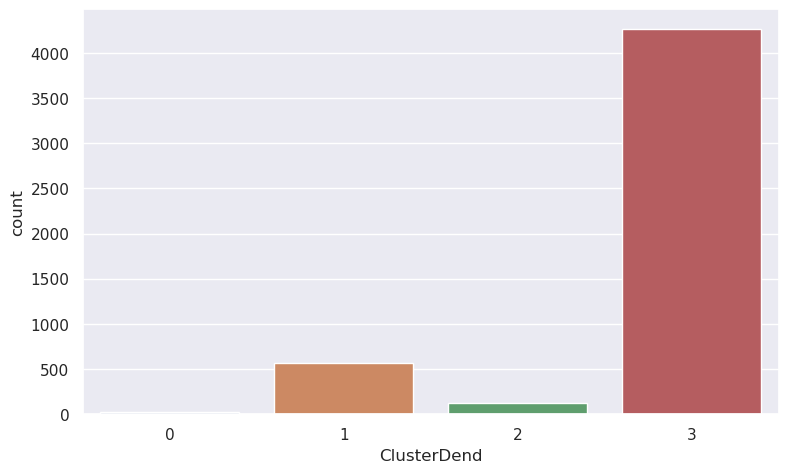

In [588]:
sns.countplot(x = df['ClusterDend'])


A diferència del model anterior, aquí podem observar que la distribució és diferent. La major part de les dades estan a l'últim clúster el (nº3) i el primer quasi no en té.

# - Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [589]:

kmSilhouette = silhouette_score(df_pca_dummies, y_pred)
agSilhouette = silhouette_score(df_pca_dummies, predic)
print("El resultat de k-means és: ", kmSilhouette , "i el de  l'Agglomerative és:",  agSilhouette)


El resultat de k-means és:  0.7683129493504076 i el de  l'Agglomerative és: 0.7578078453830118


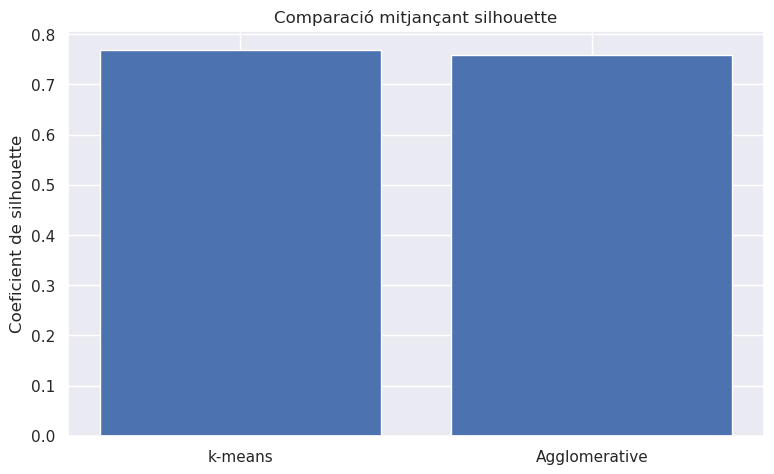

In [591]:
import matplotlib.pyplot as plt

kmSilhouette = silhouette_score(df_pca_dummies, y_pred)
agSilhouette = silhouette_score(df_pca_dummies, predic)

plt.bar(["k-means", "Agglomerative"], [kmSilhouette, agSilhouette])
plt.ylabel("Coeficient de silhouette")
plt.title("Comparació mitjançant silhouette")
plt.show()


Podem notar que el millor entre tots dos és el K-means, tot i que per molt poquet un 76% contra un 75% de l'Agglomerative. La diferència és quasi insignificant i en tots dos casos s'han utilitzat el mateix nombre de clústers.